# Speech Understanding 
# Lecture 5: synthesizing isolated vowels using numpy



### Mark Hasegawa-Johnson, KCGI, November 5, 2022

In today's lecture, we will learn how to record an audio file directly in python.  We will learn how to analyze its spectrum, in order to get information that can be used to synthesize an artificial vowel.

Here are the contents:
1. [Recording audio in jupyter: ipywebrtc](#section_ipywebrtc)
1. [Converting between different audio file formats: ffmpeg](#section_ffmpeg)
1. [Speech synthesis: Basic concepts](#section_concepts)
1. [Analyzing the peak of the vowel using numpy](#section_numpy)
1. [Making a synthetic vowel](#section_synthesis)
1. [Homework for Week 5](#homework)

<a id='section_ipywebrtc'></a>

## 1.  Recording audio in jupyter: [ipywebrtc](https://ipywebrtc.readthedocs.io/en/latest/)

The [ipywebrtc](https://ipywebrtc.readthedocs.io/en/latest/) module enables you to record audio or video directly into jupyter.

**UNSTABLE: Things in this section and the next are a little unstable.  If it doesn't work, please use Praat to record yourself.**

It is not distributed with anaconda, so before you use it, you will need to go to a terminal and type

```
pip install ipywebrtc
```
Once you have done that, you should be able to run the following block.  This will create a recorder:

In [33]:
from ipywebrtc import AudioRecorder, CameraStream
camera = CameraStream(constraints={'audio': True,'video':False})
recorder = AudioRecorder(stream=camera)
recorder

AudioRecorder(audio=Audio(value=b'', format='webm'), stream=CameraStream(constraints={'audio': True, 'video': …

Now let's look at what was returned:

In [34]:
print(recorder)

AudioRecorder(audio=Audio(value=b'', format='webm'), stream=CameraStream(constraints={'audio': True, 'video': False}))


The `recorder` object stores whatever data it recorded, in `recorder.audio.data`.  This is binary data; we need to tell python that it is audio.  The easiest way to do so is by saving it to a binary file:

In [35]:
with open('recording.webm','wb') as f:
    f.write(recorder.audio.value)

<a id='section_ffmpeg'></a>

## 2. Converting between different audio file formats: [ffmpeg](https://ffmpeg.org/)

* `ipywebrtc` records audio in [webm](https://www.webmproject.org/) format
* [webm](https://www.webmproject.org/) files are compressed using the [opus](https://opus-codec.org/) open-source audio compression algorithm
* Unfortunately, there is not yet any python library that can convert [webm](https://www.webmproject.org/) files into ordinary wav files!
* Therefore, the only way that you can work with this file is by installing some type of conversion software, such as [ffmpeg](https://ffmpeg.org/)

#### Recommended procedure:

1. Follow the instructions on [https://ffmpeg.org/](https://ffmpeg.org/) to download and install [ffmpeg](https://ffmpeg.org/)
1. Open a terminal
1. In your terminal, type

```
ffmpeg -i recording.webm -ac 1 recording.wav
```

#### Alternate procedure, if the above doesn't work for you:

Record your own voice using [praat](https://www.fon.hum.uva.nl/praat/), and save it as `recording.wav`.


#### Read the soundfile, and test that you can hear it and see it

Now you should be able to read in the waveform, plot it, and listen to it, using the tools we learned about last time.

In [36]:
import soundfile as sf

speech_wave, speech_rate = sf.read("recording.wav")

print("")
print("The file recording.wav is sampled at a frequency of", speech_rate, "samples per second")
print("It contains", len(speech_wave), "samples of audio, i.e.,", len(speech_wave)/speech_rate, "seconds")


The file recording.wav is sampled at a frequency of 44100 samples per second
It contains 175488 samples of audio, i.e., 3.9793197278911565 seconds


In [37]:
import IPython

IPython.display.Audio(data=speech_wave, rate=speech_rate)

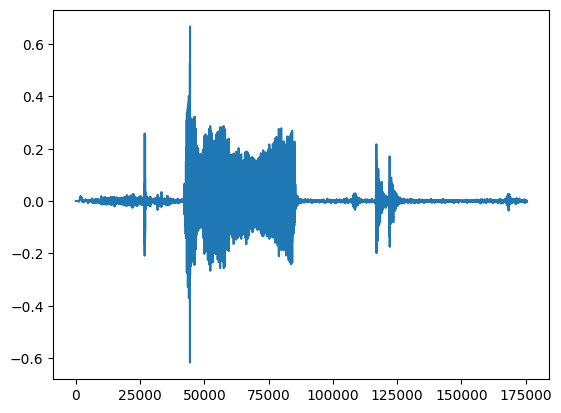

In [38]:
import matplotlib.pyplot as plt

plt.plot(speech_wave)

<a id='section_concepts'></a>

## 3. Speech synthesis: Basic concepts

<a id='section_numpy'></a>

## 4. Analyzing the peak of the vowel using [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html)

In order to synthesize a copy of the same vowel, we need to learn more about it.

First, we need to extract a small segment, about 0.1 seconds, near the peak of the vowel.  We can do that by using `np.argmax` to find the peak, then choosing a slice starting 0.05 seconds earlier, and ending 0.05 seconds later.

The peak is at sample number 44420
46625


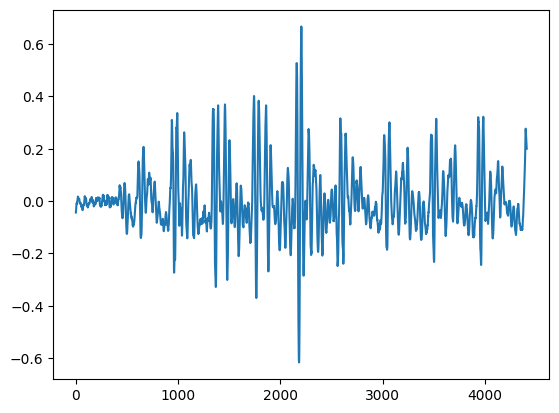

In [39]:
import numpy as np

peak_sample = np.argmax(np.abs(speech_wave))
print('The peak is at sample number',peak_sample)

segment_start = peak_sample - int(0.05*speech_rate)
print(peak_sample + int(0.05*speech_rate))
segment_end = peak_sample + int(0.05*speech_rate)
speech_segment = speech_wave[segment_start:segment_end]

plt.plot(speech_segment)


In order to synthesize it, we need to find out 

* the frequencies and 
* the amplitudes 

of the most important sine waves.  Let's try plotting the spectrum.

4410


Text(0.5, 0, 'Frequency (Hz)')

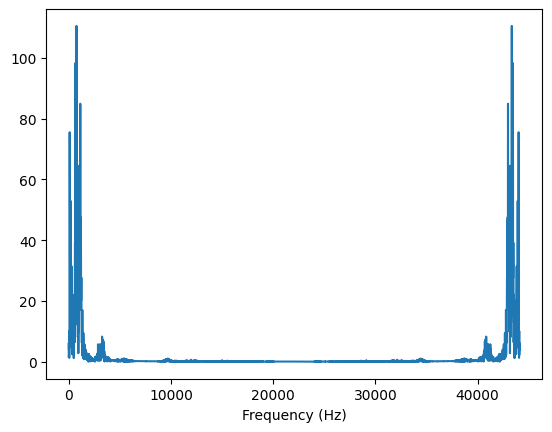

In [40]:
print(len(speech_segment))
speech_frequencies = np.linspace(0,speech_rate,len(speech_segment))
speech_spectrum = np.abs(np.fft.fft(speech_segment))
plt.plot(speech_frequencies, speech_spectrum)
plt.xlabel('Frequency (Hz)')

Clearly, we need to zoom in a little...

Text(0.5, 0, 'Frequency (Hz)')

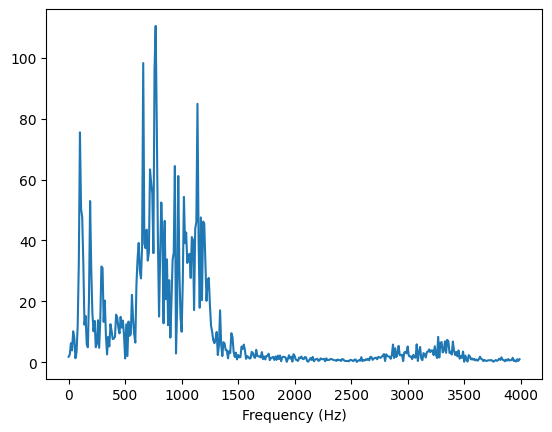

In [41]:
plt.plot(speech_frequencies[:400], speech_spectrum[:400])
plt.xlabel('Frequency (Hz)')

## 4. Do-it-yourself speech synthesis

Try to find eight frequencies in the spectrum, including 4 below 1000Hz, and 4 above 1000Hz.  Here are some hints, to make your synthetic vowel sound better:

* At least four of the frequencies should be above 1000Hz.
* Usually, all of the frequencies will be multiples of your pitch frequency.  So if your pitch frequency is 140Hz, then the first four frequencies might be $140$, $280$, $420$ and $560$, and then there might be another one at $2240$ ($=140*16$), and another two at $2520, 2660$ and $2800$ ($=140*18$, $19$, and $20$).
* Find the amplitudes by reading them off the Y-axis.

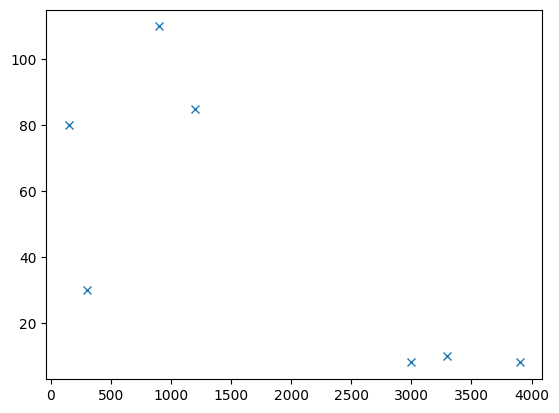

In [42]:
synthesis_frequencies = [150, 300, 900, 1200, 3000, 3300, 3900]
synthesis_amplitudes = [80, 30, 110, 85, 8, 10, 8]
plt.plot(synthesis_frequencies, synthesis_amplitudes, 'x')

Now let's create a synthetic speech signal by creating sine waves at all of those frequencies, scaled by those amplitudes:

Adding the sine wave at  (150, 80)
Adding the sine wave at  (300, 30)
Adding the sine wave at  (900, 110)
Adding the sine wave at  (1200, 85)
Adding the sine wave at  (3000, 8)
Adding the sine wave at  (3300, 10)
Adding the sine wave at  (3900, 8)


Text(0.5, 1.0, 'Synthetic Vowel')

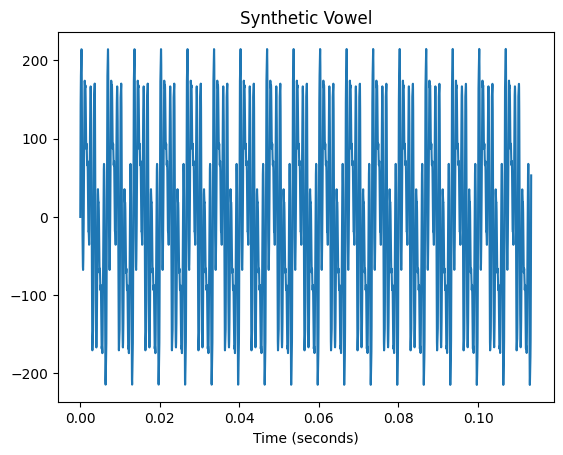

In [43]:
synthetic_timeaxis = np.linspace(0,0.5, int(0.5*speech_rate))
synthetic_speech = np.zeros(len(synthetic_timeaxis))

for (frequency,amplitude) in zip(synthesis_frequencies, synthesis_amplitudes):
    print('Adding the sine wave at ',(frequency,amplitude))
    synthetic_speech += amplitude * np.sin(2*np.pi*frequency*synthetic_timeaxis)

plt.plot(synthetic_timeaxis[:5000],synthetic_speech[:5000])
plt.xlabel('Time (seconds)')
plt.title('Synthetic Vowel')

The waveform doesn't look so similar... Let's try plotting the spectrum.

Text(0.5, 1.0, 'Spectrum of Synthetic Vowel')

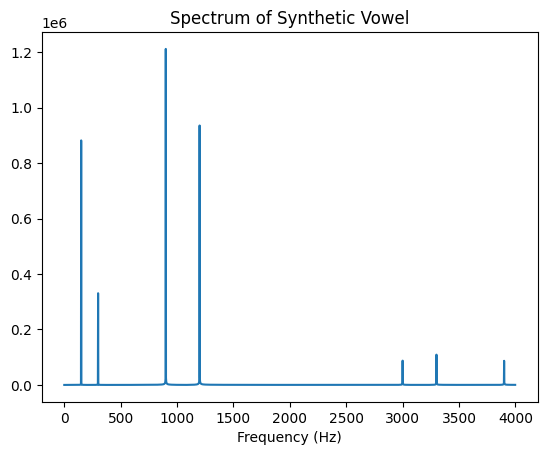

In [44]:
synthetic_spectrum = np.abs(np.fft.fft(synthetic_speech))
synthetic_frequencies = np.linspace(0,speech_rate, len(synthetic_speech))
plt.plot(synthetic_frequencies[:2000],synthetic_spectrum[:2000])
plt.xlabel('Frequency (Hz)')
plt.title('Spectrum of Synthetic Vowel')

Let's try playing it back:

In [45]:
import IPython

IPython.display.Audio(data=synthetic_speech, rate=speech_rate)

<a id="homework"></a>

## Homework for Week 5

Homework will be manually graded on Gradescope.  Submit 2 PNG files:

1. `aa_natural_spectrum.png` should show the spectrum of you saying `aa`.  It should only show the first 4000Hz.  There should be a peak at your pitch frequency, another peak at about 900Hz, and another peak at about 1100Hz.
1. `aa_synthetic_spectrum.png` should show the spectrum of your synthesized `aa` vowel.  It should show the first 4000Hz.  There should be a sine wave at your pitch frequency, another at a multiple of your pitch frequency near 900Hz, and another at a multiple of your pitch frequency near 1100Hz.